La base de données MNIST pour Modified ou Mixed National Institute of Standards and Technology, est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.

La reconnaissance de l'écriture manuscrite est un problème difficile, et un bon test pour les algorithmes d'apprentissage. La base MNIST est devenue un test standard1. Elle regroupe 60000 images d'apprentissage et 10000 images de test, issues d'une base de données antérieure, appelée simplement NIST1. Ce sont des images en noir et blanc, normalisées centrées de 28 pixels de côté1.

In [37]:
# Importer les modules nécessaires
import numpy as np  # Module pour les opérations mathématiques sur les tableaux multidimensionnels
import keras  # Bibliothèque pour l'apprentissage en profondeur
import seaborn as sns  # Bibliothèque pour la visualisation de données statistiques
from keras.models import load_model  # Fonction pour charger un modèle pré-entraîné
import os  # Module pour les opérations système
import random  # Module pour la génération de nombres aléatoires
import cv2  # Bibliothèque pour le traitement d'images
import matplotlib.pyplot as plt  # Bibliothèque pour la visualisation de données
from keras.models import Sequential  # Classe pour créer des modèles séquentiels
from keras.optimizers import Adam  # Classe pour l'optimisation du modèle
from sklearn.metrics import confusion_matrix  # Fonction pour calculer la matrice de confusion
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation  # Classes pour les différentes couches du modèle
import pandas as pd  # Bibliothèque pour la manipulation de données tabulaires
# Ignorer les avertissements
np.seterr(divide='ignore')
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in divide")

In [38]:
# charger les données de MNIST depuis keras
# mnist = keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

In [40]:
# Lecture du fichier CSV contenant les données d'entraînement de MNIST
mnist_train = pd.read_csv('dataset/dataset/mnist_train.csv')

# Lecture du fichier CSV contenant les données de test de MNIST
mnist_test = pd.read_csv('dataset/dataset/mnist_test.csv')

# Extraction des caractéristiques (pixels) des images d'entraînement
x_train = mnist_train.iloc[:, 1:].values

# Extraction des étiquettes (chiffres) correspondant aux images d'entraînement
y_train = mnist_train.iloc[:, 0].values

# Extraction des caractéristiques (pixels) des images de test
x_test = mnist_test.iloc[:, 1:].values

# Extraction des étiquettes (chiffres) correspondant aux images de test
y_test = mnist_test.iloc[:, 0].values

In [41]:
mnist_train.head(10)
# Cette ligne de code affiche les premières lignes du dataframe mnist_train.
# La méthode .head() est utilisée pour afficher les premières lignes d'un dataframe.

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
mnist_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


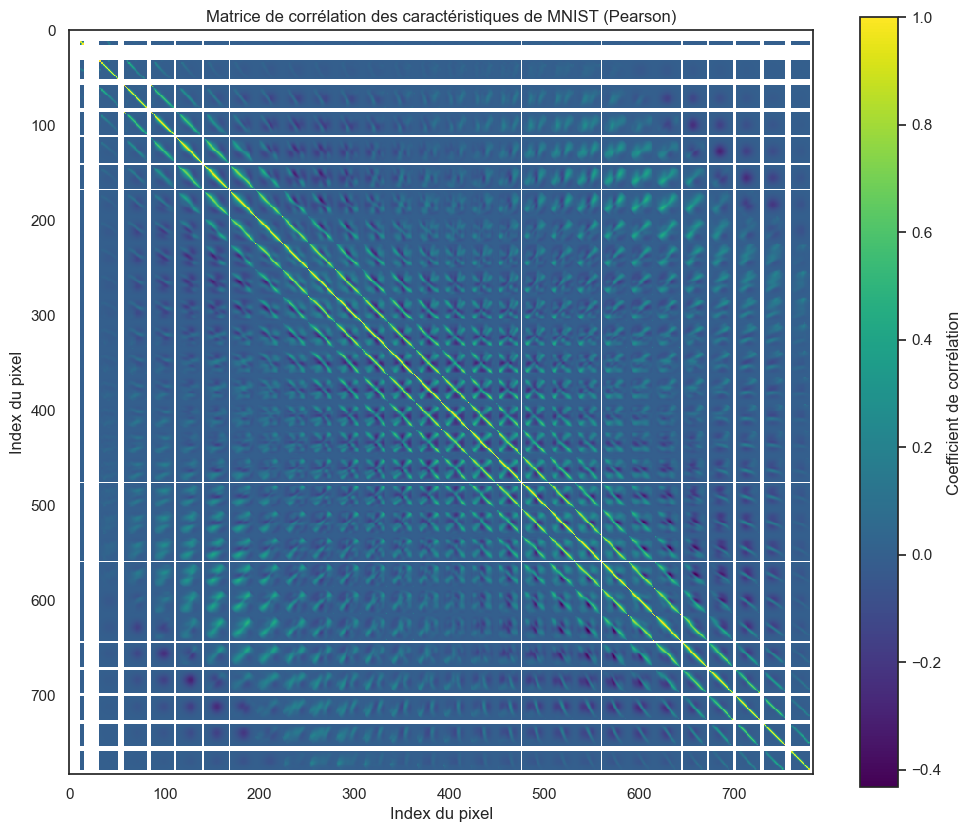

In [43]:
# Calculer la matrice de corrélation: Corrélation de Pearson
# Calculer la transposée de la matrice x_train
x_train_transpose = np.transpose(x_train)

# Calculer la matrice de corrélation
corr_matrix = np.corrcoef(x_train_transpose)

# Créer un tracé de la matrice de corrélation
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Coefficient de corrélation')
plt.title('Matrice de corrélation des caractéristiques de MNIST (Pearson)')
plt.xlabel('Index du pixel')
plt.ylabel('Index du pixel')
plt.show()

In [44]:
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)
# Cette ligne de code indique que nous allons remodeler les données pour les rendre compatibles avec un format de 28x28x1.
# Cela signifie que chaque image sera redimensionnée en une matrice de 28 lignes, 28 colonnes et 1 canal de couleur.
# Le canal de couleur est défini sur 1 car les images MNIST sont en noir et blanc, donc elles n'ont qu'un seul canal.
# Cette étape est nécessaire pour préparer les données d'entrée pour l'entraînement du modèle CNN.

In [45]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


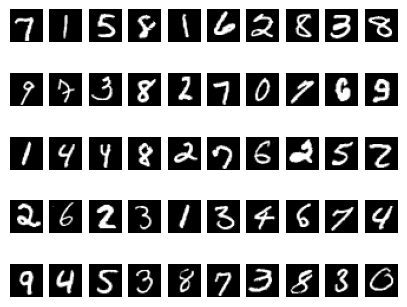

In [46]:
# afficher une image aléatoire 50 images de l'ensemble de données
fig, ax = plt.subplots(5, 10, figsize=(5, 4))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[random.randint(0, x_train.shape[0])], cmap='gray' )
    plt.axis('off')
plt.show()

In [47]:
print(x_train[0])
 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

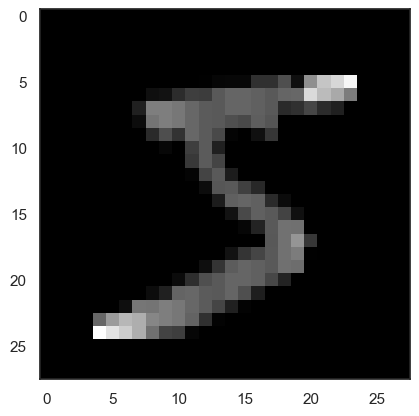

In [48]:
# normalisation des données
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)
# afficher une image normalisée
plt.imshow(x_train[0], cmap=plt.cm.gray)

In [49]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [50]:
print(y_train[0])

5


In [51]:
# Définition de la taille des images
IMG_SIZE = 28

# Remodelage des données d'entraînement pour les rendre compatibles avec le modèle CNN
x_train_r = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Remodelage des données de test pour les rendre compatibles avec le modèle CNN
x_test_r = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Affichage de la forme des données d'entraînement remodelées
print("x_train.shape = ", x_train_r.shape)

# Affichage de la forme des données de test remodelées
print("x_test.shape = ", x_test_r.shape)


x_train.shape =  (60000, 28, 28, 1)
x_test.shape =  (10000, 28, 28, 1)


In [52]:
x_train_r.shape[1:]

(28, 28, 1)

In [53]:
model = Sequential()

# 1ère couche de convolution
model.add(Conv2D(64, (3, 3), input_shape=x_train_r.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2ème couche de convolution
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3ème couche de convolution
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Connexion
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Couche de sortie
model.add(Dense(10))
model.add(Activation('softmax'))

<img src="./cnn_img_best.png" style="height:400px" />
<img src="./cnn_img_best_2.png" style="height:400px;width:750px" />



In [54]:
print("Total training samples = ", len(x_train_r))

Total training samples =  60000


In [55]:
import json
import os

if os.path.isdir('mnist.model'):
    # Charge le modèle
    model = load_model('mnist.model')
    with open('mnist.model/history.json', 'r') as h:
        history = json.load(h)
    print(history)    
else:
    # Compilation du modèle
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
    # Entraîne et sauvegarde le modèle
    history = model.fit(x_train_r, y_train, batch_size=64, epochs=25, 
                        validation_data=(x_test_r, y_test))
    model.save('mnist.model')
    history = history.history
    with open('mnist.model/history.json', 'w') as h:
        json.dump(history, h)

{'loss': [0.0828562080860138, 0.058784015476703644, 0.051277853548526764, 0.044360291212797165, 0.04313766211271286, 0.03720806911587715, 0.03474663197994232, 0.02922401763498783, 0.03124895505607128, 0.029810253530740738, 0.02509204111993313, 0.023858441039919853, 0.023120082914829254, 0.02358393371105194, 0.019910864531993866, 0.02183770202100277, 0.019139176234602928, 0.01860835961997509, 0.018756825476884842, 0.017171388491988182, 0.018195005133748055, 0.014722797088325024, 0.01819436624646187, 0.01693037897348404, 0.016572967171669006], 'accuracy': [0.9761833548545837, 0.982200026512146, 0.9850166440010071, 0.9868833422660828, 0.987583339214325, 0.9891499876976013, 0.989883303642273, 0.9914666414260864, 0.9908833503723145, 0.9909666776657104, 0.9926666617393494, 0.9934499859809875, 0.9934166669845581, 0.9934499859809875, 0.994183361530304, 0.9938499927520752, 0.9944333434104919, 0.9946500062942505, 0.994949996471405, 0.9951333403587341, 0.9950500130653381, 0.9959333539009094, 0.99

In [56]:
# Évaluer le modèle sur les données d'entraînement
train_loss, train_acc = model.evaluate(x_train_r, y_train)

# Imprimer la perte du train et la précision du train
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)

1875/1875 [==============================] - 43s 23ms/step - loss: 0.0059 - accuracy: 0.9980
Train loss: 0.005940393079072237
Train accuracy: 0.998033344745636


In [57]:
# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(x_test_r, y_test)

# Imprimer la perte et la précision du test
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 7s 23ms/step - loss: 0.0563 - accuracy: 0.9907
Test loss: 0.05626703053712845
Test accuracy: 0.9907000064849854


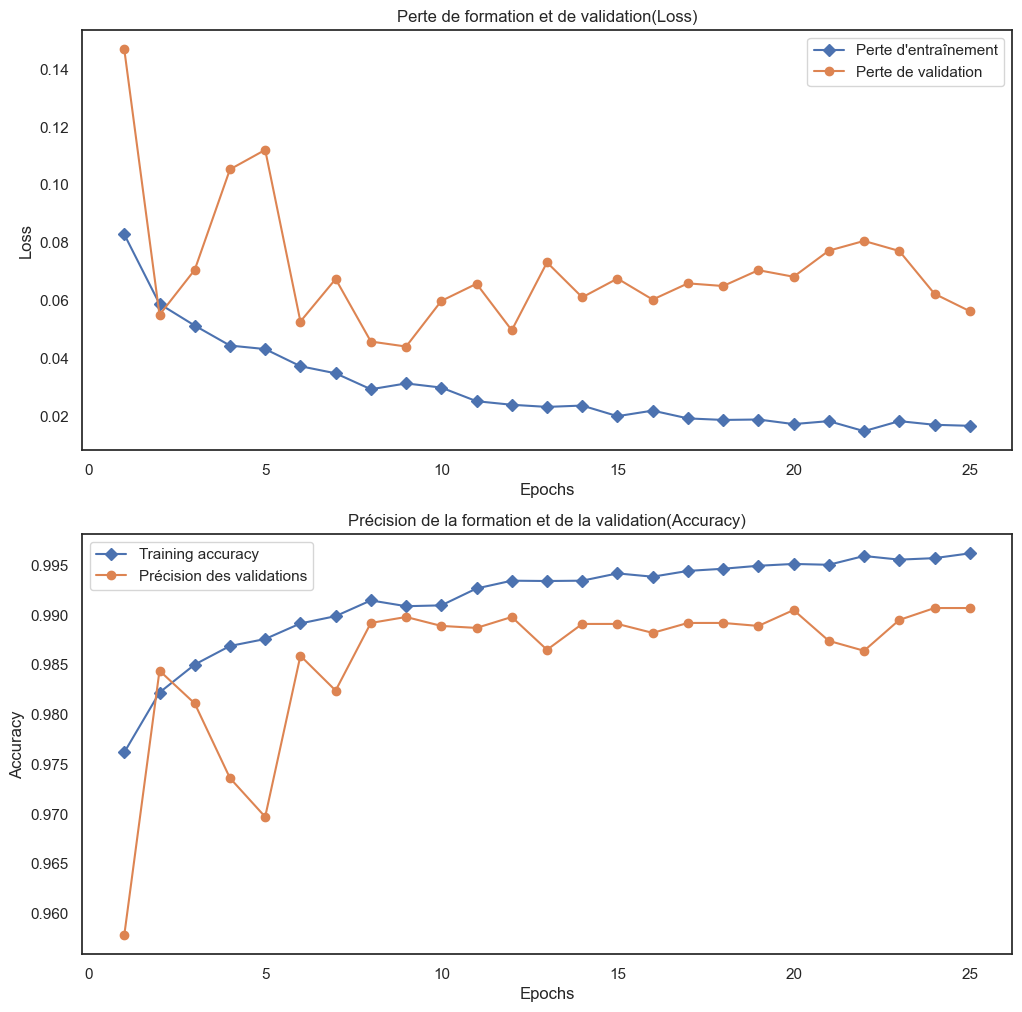

In [58]:
# Tracer les courbes
epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(epochs, history['loss'], marker='D', label='Perte d\'entraînement')
plt.plot(epochs, history['val_loss'], marker='o', label='Perte de validation')
plt.title('Perte de formation et de validation(Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, history['accuracy'], marker='D', label='Training accuracy')
plt.plot(epochs, history['val_accuracy'], marker='o', label='Précision des validations')
plt.title('Précision de la formation et de la validation(Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plt.tight_layout()
plt.show()

313/313 [==============================] - 8s 24ms/step


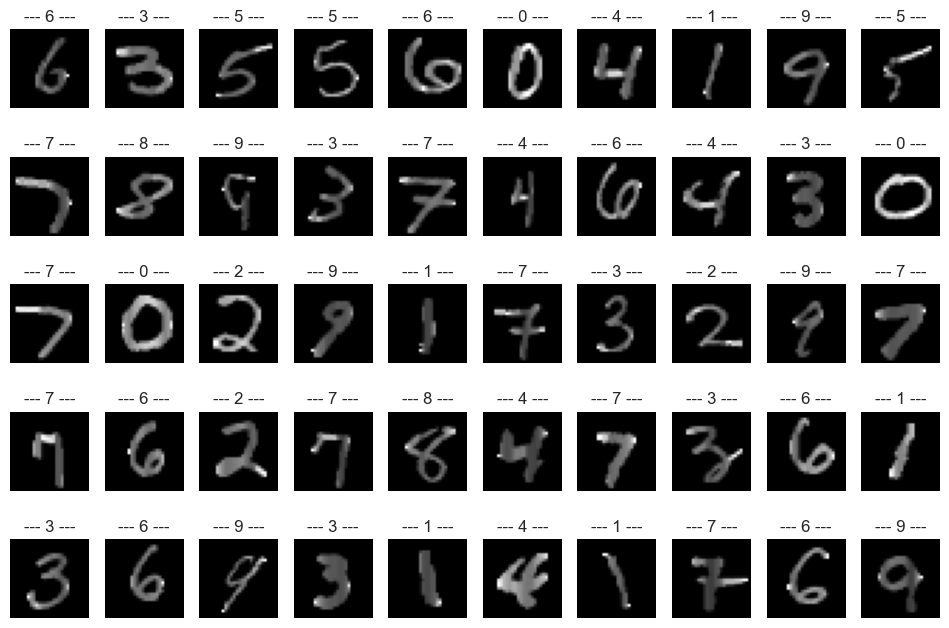

In [59]:
predictions = model.predict([x_test_r])
# add all predictions to a list
predicted_labels = []
for i in range(len(predictions)):
    predicted_labels.append(np.argmax(predictions[i]))

# Tracer les prédictions par rapport aux vraies étiquettes
fig, ax = plt.subplots(5, 10, figsize=(12, 8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_test[i+50], cmap='gray')
    plt.title(f"--- {np.argmax(predictions[i+50])} ---")
    plt.axis('off')
plt.show()

Text(47.25, 0.5, 'Valeurs réelles')

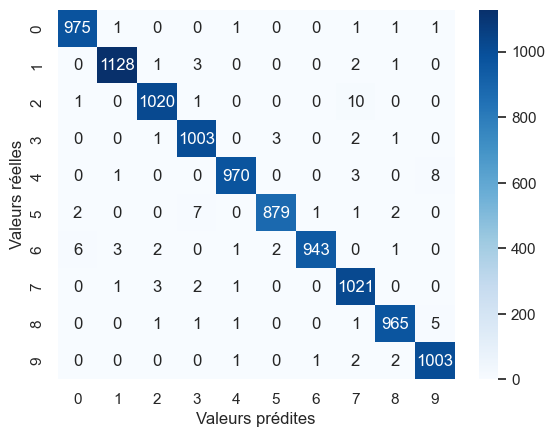

In [60]:
# Génération d'une matrice de confusion pour observer les erreurs
# Toutes les valeurs sortant de la diagonales sont les erreurs de classification
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valeurs prédites')     
plt.ylabel('Valeurs réelles')

In [61]:
print(np.argmax(predictions[0]))

7


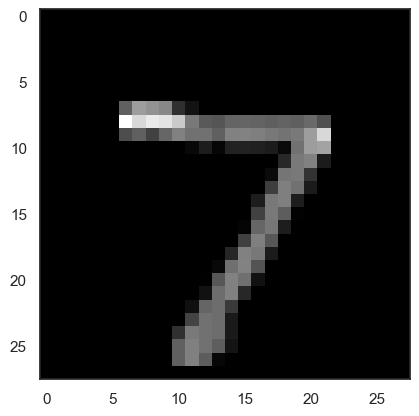

In [62]:
plt.imshow(x_test[0], cmap='gray')

In [63]:
print(np.argmax(predictions[127]))

5


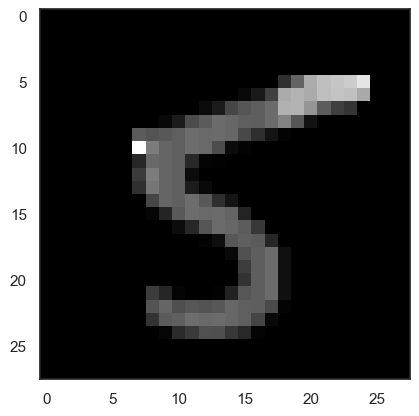

In [64]:
plt.imshow(x_test[127], cmap='gray')

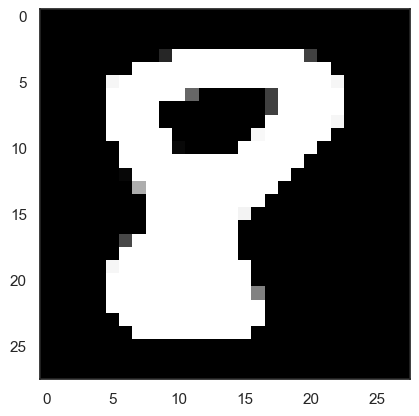

In [65]:
img = cv2.imread('pred_img/3.png')          
plt.imshow(img)

In [66]:
img.shape

(28, 28, 3)

In [67]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get the shape of the grayscale image
gray.shape

(28, 28)

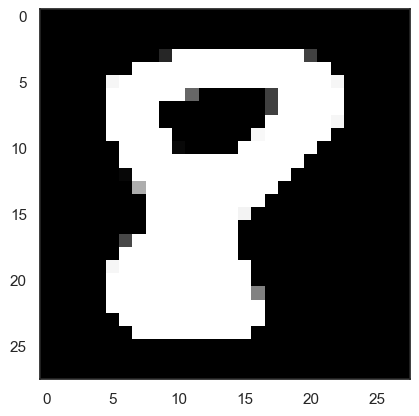

In [68]:
# Redimensionner l'image en utilisant la fonction resize de OpenCV
redim_img = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

# Afficher la forme de l'image redimensionnée
redim_img.shape

# Afficher l'image redimensionnée
plt.imshow(redim_img, cmap='gray')


In [69]:
# Normaliser l'image
norm_img = keras.utils.normalize(redim_img, axis=1)

# Remodeler l'image normalisée pour correspondre à la forme d'entrée du modèle
norm_img = np.array(norm_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Afficher la forme de l'image normalisée
norm_img.shape

(1, 28, 28, 1)

In [70]:
prediction = model.predict(norm_img)
norm_img.shape

1/1 [==============================] - 0s 302ms/step


(1, 28, 28, 1)

In [71]:
print('*********************************************')
print(f'|           la prédiction est : {np.argmax(prediction)}           |')
print('*********************************************')

*********************************************
|           la prédiction est : 8           |
*********************************************
